# **Decision Tree**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [1]:
#extracting the compressed file
from zipfile import ZipFile
dataset = '/content/archive.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [3]:
dataset = pd.read_csv('/content/salary_prediction_data.csv')
dataset.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [21]:
inputs =dataset.drop('Salary',axis='columns')
target = dataset['Salary']

In [22]:
target

,Salary
0,84620.053665
1,142591.255894
2,97800.255404
3,96834.671282
4,132157.786175
...,...
995,64683.389864
996,74468.205020
997,98207.026024
998,108544.922720


In [23]:
le_job = LabelEncoder()
le_location = LabelEncoder()
le_education = LabelEncoder()
le_gender=LabelEncoder()


In [10]:
inputs['job_title_n'] = le_job.fit_transform(inputs['Job_Title'])
inputs['location_n'] = le_location.fit_transform(inputs['Location'])
inputs['education_n'] = le_education.fit_transform(inputs['Education'])
inputs['gender_n']=le_gender.fit_transform(inputs['Gender'])

In [11]:
inputs.head()

,Education,Experience,Location,Job_Title,Age,Gender,job_title_n,location_n,education_n,gender_n
0,High School,8,Urban,Manager,63,Male,3,2,1,1
1,PhD,11,Suburban,Director,59,Male,1,1,3,1
2,Bachelor,28,Suburban,Manager,61,Female,3,1,0,0
3,High School,29,Rural,Director,45,Male,1,0,1,1
4,PhD,25,Urban,Analyst,26,Female,0,2,3,0


In [12]:
inputs_n = inputs.drop(['Job_Title','Location','Education','Gender'],axis='columns')
inputs_n

,Experience,Age,job_title_n,location_n,education_n,gender_n
0,8,63,3,2,1,1
1,11,59,1,1,3,1
2,28,61,3,1,0,0
3,29,45,1,0,1,1
4,25,26,0,2,3,0
...,...,...,...,...,...,...
995,8,25,0,1,1,0
996,24,30,2,2,1,0
997,18,44,0,0,2,1
998,27,31,1,1,0,0


In [17]:
bins = [0, 30000, 60000, 90000, 120000, float('inf')]  # Adjust bins as needed
labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High'] # Adjust labels as needed

dataset['Salary_Category'] = pd.cut(dataset['Salary'], bins=bins, labels=labels)

target = dataset['Salary_Category']

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [19]:
model.score(inputs_n,target)

0.999

In [25]:
model.predict([[8,63,3,2,1,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['High'], dtype=object)

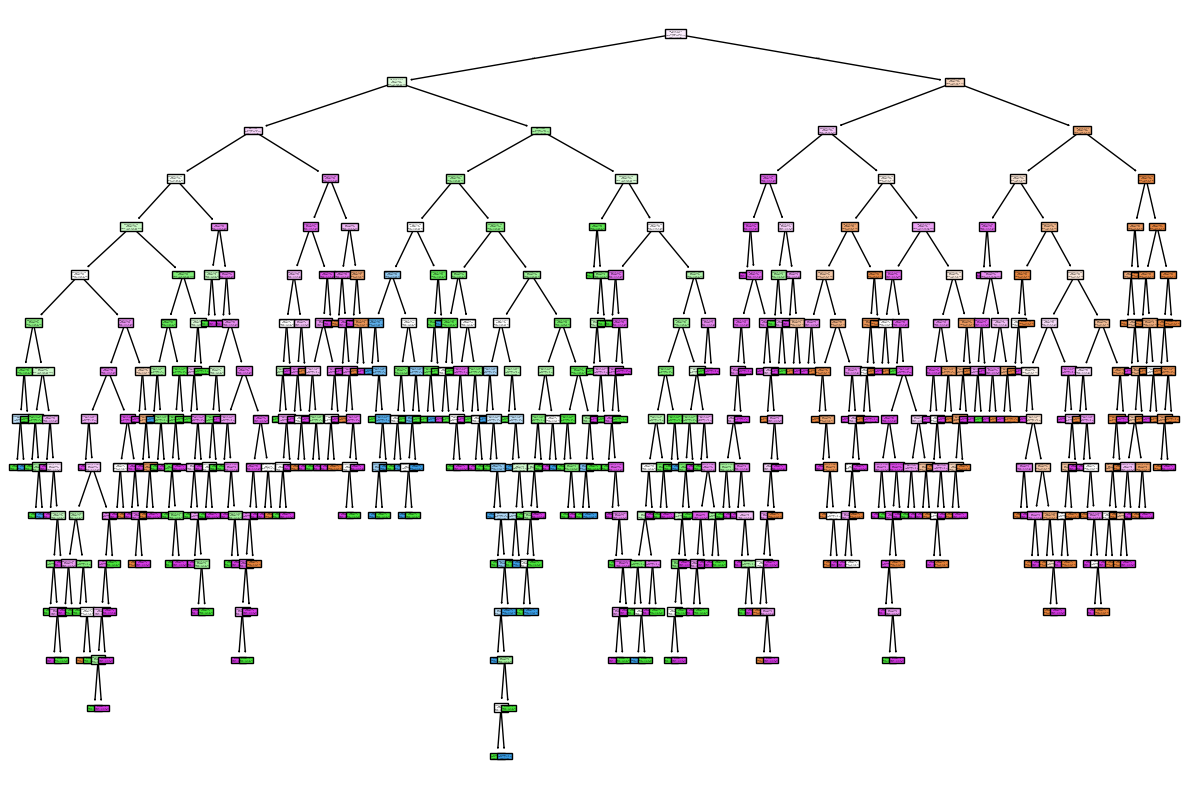

In [29]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,
              feature_names=['Experience','location_n','education_n','gender_n','job_title_n','Company_Size'],
              class_names=['Low', 'Medium', 'High', 'Very High', 'Extremely High'],
              filled=True);
